In [1]:
%matplotlib inline
import pandas as pd

path="C:\\Users\\nived\\Desktop\\Nivi ideapad Lenovo\\Nivoo SJ\\SJSU sem 2\\CS274\\project ideas\\nivedhitha book recomm\\data\\goodbooks-10k-master\\"
ratings = pd.read_csv( path+'ratings.csv' )
actual_ratings = pd.read_csv( path+'ratings.csv' )
to_read = pd.read_csv( path+'to_read.csv' )
books = pd.read_csv( path+'books.csv' )

tags = pd.read_csv( path+'tags.csv' )
book_tags = pd.read_csv( path+'book_tags.csv')

#print len(r)




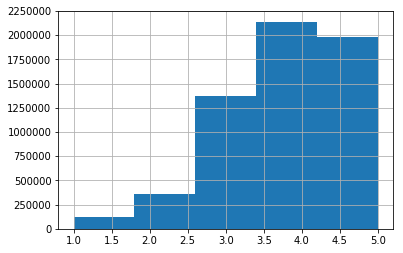

In [2]:
ratings.rating.hist( bins = 5 )

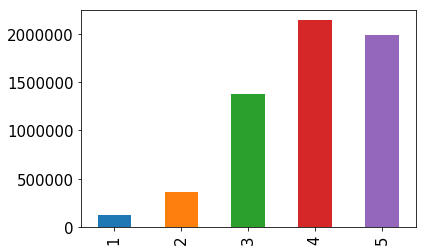

In [3]:
import matplotlib as plt
plt.rc("font",size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')

In [4]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [5]:
from math import *
  
def jaccard_similarity(x,y):
  
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 #print intersection_cardinality
 union_cardinality = len(set.union(*[set(x), set(y)]))
 #print union_cardinality 
 return intersection_cardinality/float(union_cardinality)
  
print(jaccard_similarity([0,0,2],[0,1,4]))

from math import *

def intersect(a, b):
    return list(set(a) & set(b))
    #print(intersect(b1, b2))

def jacra_similarity(x,y):
    sum_rate=0
    for i in range(len(x)):
        #for each user's rating for book x and y
        if(x[i+1]!=0 and y[i+1]!=0):
            #then both books have been rated something by user i
            min_rate=min(x[i+1],y[i+1])
            max_rate=max(x[i+1],y[i+1])
            sum_rate+=min_rate/max_rate
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    jacra=jaccard_similarity(x,y)*(sum_rate/intersection_cardinality)
    return jacra
  
#print(intersect([1,2,3],[5,2,0]))
#print(jacra_similarity([1,2,3],[5,2,0]))
#print(jaccard_similarity([1,2,3],[5,2,0]))

0.25


In [6]:
ratings_mtx_jaccard = ratings.pivot(index = 'user_id', columns ='book_id', values = 'rating').fillna(0)
ratings_mtx_jacra = ratings.pivot(index = 'user_id', columns ='book_id', values = 'rating').fillna(0)
ratings_mtx_jaccard.head()
actualRatings = actual_ratings.pivot(index = 'user_id', columns ='book_id', values = 'rating').fillna(0)
#ratings_mtx_jacra.head()

## don't run below
#n_users=small_ratings.user_id.unique().shape[0]
#n_books=small_ratings.book_id.unique().shape[0]
#print('Number of users = ' + str(n_users) + ' | Number of books = ' + str(n_books))

In [7]:
sratings_mtx_jaccard=ratings_mtx_jaccard.iloc[0:50,0:100]
sratings_mtx_jaccard.head()

book_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,1.0,4.0,0.0,0.0,3.0,0.0,4.0
2,0.0,5.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,5.0,...,0.0,0.0,5.0,1.0,4.0,0.0,3.0,0.0,0.0,3.0
5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
sratings_mtx_jacra=ratings_mtx_jacra.iloc[0:50,0:100]
sratings_mtx_jacra.head()

book_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,1.0,4.0,0.0,0.0,3.0,0.0,4.0
2,0.0,5.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,5.0,...,0.0,0.0,5.0,1.0,4.0,0.0,3.0,0.0,0.0,3.0
5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def initialize_sim_mtx(method):
    if(method=='jaccard'):
        unique_ISBN=sratings_mtx_jaccard.columns.unique()
        #print(len(unique_ISBN))
        sim_jaccard_mtx=pd.DataFrame(index=unique_ISBN,columns=unique_ISBN).fillna(0.0).as_matrix()
        print(sim_jaccard_mtx)
        return(sim_jaccard_mtx)
    elif(method=='jacra'):
        unique_ISBN=sratings_mtx_jacra.columns.unique()
        #print(len(unique_ISBN))
        sim_jacra_mtx=pd.DataFrame(index=unique_ISBN,columns=unique_ISBN).fillna(0.0).as_matrix()
        print(sim_jacra_mtx)
        return(sim_jacra_mtx)
        

In [10]:
def construct_sim_mtx(matrix,method):    
    for i,row in enumerate(matrix):
        for j,cell in enumerate(row):
            if i!=j :
                if method=='jaccard':
                    ratings_isbn1=sratings_mtx_jaccard.iloc[:,i]
                    ratings_isbn2= sratings_mtx_jaccard.iloc[:,j]
                    sim=round(jaccard_similarity(ratings_isbn1,ratings_isbn2),3)
                    sim_jaccard_mtx[i][j]=sim
                elif method=='jacra':
                    ratings_isbn1=sratings_mtx_jacra.iloc[:,i]
                    ratings_isbn2= sratings_mtx_jacra.iloc[:,j]
                    sim=round(jacra_similarity(ratings_isbn1,ratings_isbn2),3)
                    sim_jacra_mtx[i][j]=sim                
    print("done")
            

In [11]:
sim_jaccard_mtx=initialize_sim_mtx('jaccard')
construct_sim_mtx(sim_jaccard_mtx,'jaccard')
print(sim_jaccard_mtx)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
done
[[0.   1.   0.8  ... 1.   0.25 0.8 ]
 [1.   0.   0.8  ... 1.   0.25 0.8 ]
 [0.8  0.8  0.   ... 0.8  0.2  1.  ]
 ...
 [1.   1.   0.8  ... 0.   0.25 0.8 ]
 [0.25 0.25 0.2  ... 0.25 0.   0.2 ]
 [0.8  0.8  1.   ... 0.8  0.2  0.  ]]


In [12]:
sim_jacra_mtx=initialize_sim_mtx('jacra')
construct_sim_mtx(sim_jacra_mtx,'jacra')
print(sim_jacra_mtx)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
done
[[0.    1.088 0.55  ... 0.888 0.    0.61 ]
 [1.088 0.    0.44  ... 0.388 0.    0.79 ]
 [0.55  0.44  0.    ... 0.15  0.    0.46 ]
 ...
 [0.888 0.388 0.15  ... 0.    0.    0.3  ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.61  0.79  0.46  ... 0.3   0.    0.   ]]


In [82]:
print("jaccard sim: ", sim_jaccard_mtx)
print("jacra sim: ", sim_jacra_mtx)

jaccard sim:  [[0.   1.   0.8  ... 1.   0.25 0.8 ]
 [1.   0.   0.8  ... 1.   0.25 0.8 ]
 [0.8  0.8  0.   ... 0.8  0.2  1.  ]
 ...
 [1.   1.   0.8  ... 0.   0.25 0.8 ]
 [0.25 0.25 0.2  ... 0.25 0.   0.2 ]
 [0.8  0.8  1.   ... 0.8  0.2  0.  ]]
jacra sim:  [[0.    1.088 0.55  ... 0.888 0.    0.61 ]
 [1.088 0.    0.44  ... 0.388 0.    0.79 ]
 [0.55  0.44  0.    ... 0.15  0.    0.46 ]
 ...
 [0.888 0.388 0.15  ... 0.    0.    0.3  ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.61  0.79  0.46  ... 0.3   0.    0.   ]]


In [83]:
#jaccard
actualRatings=actualRatings.iloc[0:50,0:100]
actualRatings_mtx=actualRatings.as_matrix()
print(actualRatings_mtx)

#actual_ratings_matrix=sratings_mtx_jaccard.as_matrix()
#actual_ratings_matrix=np.nan_to_num(actual_ratings_matrix)
#actual_ratings_matrix

[[0. 0. 0. ... 3. 0. 4.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 3. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]]


In [84]:
def get_pred(actualRatings_mtx,method):
    pred_rating=0
    if(method=='jaccard'):
        print("predicting for jaccard")
        predicted_ratings_matrix=ratings_mtx_jaccard.iloc[0:50,0:100].as_matrix()
        #actual_ratings_matrix=sratings_mtx_jaccard.as_matrix()
        print("actual for jaccard ",actualRatings_mtx)
        print("predicted for jaccard ",predicted_ratings_matrix)
        for i,user in enumerate(actualRatings_mtx):
            # i is userid row is all books
            sum_user_j=0
            denom=0
            for j,book in enumerate(user):
                #should update in predicted_ratings_matrix[i][j]
                if(predicted_ratings_matrix[i][j]!=0):
                    sum_user_j+=sim_jaccard_mtx[i][j]*actualRatings_mtx[i][j]
                    denom+=sim_jaccard_mtx[i][j]
                    pred_rating=sum_user_j/denom
                #print("for i ,j", i,j," sum: ",sum_user_j," denom: ",denom," total rating: ",pred_rating)
                predicted_ratings_matrix[i][j]=pred_rating
    elif(method=='jacra'):
        print("predicting for jacra")
        predicted_ratings_matrix=ratings_mtx_jacra.iloc[0:50,0:100].as_matrix()
        #actual_ratings_matrix=sratings_mtx_jacra.as_matrix()
        print("actual for jacra ",actualRatings_mtx)
        print("predicted for jacra ",predicted_ratings_matrix)
        for i,user in enumerate(actualRatings_mtx):
            # i is userid row is all books
            sum_user_j=0
            denom=0
            for j,book in enumerate(user):
                #should update in predicted_ratings_matrix[i][j]
                if(predicted_ratings_matrix[i][j]!=0):
                    sum_user_j+=sim_jacra_mtx[i][j]*actualRatings_mtx[i][j]
                    denom+=sim_jacra_mtx[i][j]
                    pred_rating=sum_user_j/denom
                #print("for i ,j", i,j," sum: ",sum_user_j," denom: ",denom," total rating: ",pred_rating)
                predicted_ratings_matrix[i][j]=pred_rating
    return predicted_ratings_matrix

            

In [102]:
def rmse_mymethod(actual,predicted):
    sumsq=0.0
    count=0
    for i,row in enumerate(actual):
        for j,cell in enumerate(row):
            if(actual[i][j]!=0):
                count+=1
                sumsq+=((predicted[i][j]-actual[i][j])**2)
                #print(i,j,actual[i][j])
    print("count: ",count)
    return np.sqrt(sumsq/count)
    #return np.sqrt((sumsq).mean())

#rmse(np.array([2,2,3]), np.array([0,2,6]))
#rmse_mymethod(actual_ratings_matrix,predicted_ratings_matrix)
def rmse(actual,predicted):
    return np.sqrt(((predicted-actual)**2).mean())

def mae_mymethod(actual,predicted):
    sum_abs=0.0
    count=0
    for i,row in enumerate(actual):
        for j,cell in enumerate(row):
            if(actual[i][j]!=0):
                count+=1
                sum_abs+=abs(predicted[i][j]-actual[i][j])
                #print(i,j,actual[i][j])
    return(sum_abs/count)
    #return np.sqrt((sumsq).mean())



In [124]:
import numpy as np
predicted_ratings_matrix=get_pred(actualRatings_mtx,method='jaccard')
#converts Nan to 0
predicted_ratings_matrix=np.nan_to_num(predicted_ratings_matrix)
predicted_ratings_matrix

predicting for jaccard
actual for jaccard  [[0. 0. 0. ... 3. 0. 4.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 3. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]]
predicted for jaccard  [[0.         0.         0.         ... 1.25029291 1.24604899 1.27564068]
 [1.27564068 1.27564068 1.27564068 ... 0.97973813 0.97636679 0.96573272]
 [0.96573272 0.96573272 0.96573272 ... 0.24877678 0.24805219 0.24449165]
 ...
 [0.42836676 0.42836676 0.42836676 ... 0.16447634 0.16386386 0.1619342 ]
 [3.         1.5        0.9        ... 0.77184466 0.76848986 0.7579478 ]
 [0.7579478  3.         1.66666667 ... 0.51750627 0.51576855 0.51028544]]


array([[0.        , 0.        , 0.        , ..., 1.25029291, 1.24604899,
        1.27564068],
       [0.        , 0.        , 0.        , ..., 0.94325949, 0.94013413,
        0.93027068],
       [0.        , 0.        , 0.        , ..., 0.24309589, 0.24240397,
        0.23900262],
       ...,
       [0.        , 0.        , 0.        , ..., 0.146286  , 0.1458013 ,
        0.14427163],
       [3.        , 1.5       , 0.9       , ..., 0.77184466, 0.76848986,
        0.7579478 ],
       [0.        , 1.5       , 1.07142857, ..., 0.51062472, 0.50893283,
        0.50359335]])

In [129]:
##0.96 jaccard
print("jaccard rmse my method: ", rmse_mymethod(actualRatings_mtx,predicted_ratings_matrix))
print("jaccard rmse: ",rmse(actualRatings_mtx,predicted_ratings_matrix))

count:  866
jaccard rmse my method:  2.6920138764811075
jaccard rmse:  1.4357586179949107


In [126]:
import sklearn.metrics as skmetrics
#mae = np.sum(np.absolute((imageB.astype("float") - imageA.astype("float")))
print("jaccard mae my method: ",mae_mymethod(actualRatings_mtx, predicted_ratings_matrix))
#print("jaccard mae: ",skmetrics.mean_absolute_error(actualRatings_mtx, predicted_ratings_matrix))

jaccard mae my method:  2.42774182742154


In [106]:
print("actual: ",actualRatings_mtx)

actual:  [[0. 0. 0. ... 3. 0. 4.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 3. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]]


In [116]:
predicted_ratings_matrix=get_pred(actualRatings_mtx,method='jacra')
#converts Nan to 0
predicted_ratings_matrix=np.nan_to_num(predicted_ratings_matrix)
predicted_ratings_matrix

predicting for jacra
actual for jacra  [[0. 0. 0. ... 3. 0. 4.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 3. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]]
predicted for jacra  [[0.         0.         0.         ... 1.52475842 1.52475842 1.55114739]
 [0.         0.         0.         ... 1.88016495 1.88016495 1.86003361]
 [0.         0.         0.         ... 0.22333036 0.22333036 0.21834675]
 ...
 [0.         0.         0.         ... 0.12312188 0.12312188 0.12100777]
 [3.         1.36363636 0.64608758 ... 1.12478535 1.12478535 1.10623206]
 [0.         1.09090909 0.98360656 ... 0.40676565 0.40676565 0.39795535]]


c:\users\nived\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


array([[0.        , 0.        , 0.        , ..., 1.52475842, 1.52475842,
        1.55114739],
       [1.55114739, 1.55114739, 1.55114739, ..., 1.96468247, 1.96468247,
        1.94271114],
       [1.94271114, 1.94271114, 1.94271114, ..., 0.23486746, 0.23486746,
        0.22936201],
       ...,
       [0.58681086, 0.58681086, 0.58681086, ..., 0.14656835, 0.14656835,
        0.14358214],
       [3.        , 1.36363636, 0.64608758, ..., 1.12478535, 1.12478535,
        1.10623206],
       [1.10623206, 3.        , 2.30769231, ..., 0.41534798, 0.41534798,
        0.40616618]])

In [117]:
actualRatings_mtx

array([[0., 0., 0., ..., 3., 0., 4.],
       [0., 5., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 3., 0., 0.],
       [0., 3., 0., ..., 0., 0., 0.]])

In [118]:
#1.86 jacra
print("jacra rmse my method: ", rmse_mymethod(actualRatings_mtx,predicted_ratings_matrix))
#print("jacra rmse: ",rmse(actualRatings_mtx,predicted_ratings_matrix))

count:  866
jacra rmse my method:  2.3796548795198134


In [119]:
import sklearn.metrics as skmetrics
#mae = np.sum(np.absolute((imageB.astype("float") - imageA.astype("float")))
print("jacra mae my method: ",mae_mymethod(actualRatings_mtx, predicted_ratings_matrix))
#print("jacra mae: ",skmetrics.mean_absolute_error(actualRatings_mtx, predicted_ratings_matrix))

jacra mae my method:  2.018840501934289


In [127]:
predicted_ratings_matrix

array([[0.        , 0.        , 0.        , ..., 1.25029291, 1.24604899,
        1.27564068],
       [0.        , 0.        , 0.        , ..., 0.94325949, 0.94013413,
        0.93027068],
       [0.        , 0.        , 0.        , ..., 0.24309589, 0.24240397,
        0.23900262],
       ...,
       [0.        , 0.        , 0.        , ..., 0.146286  , 0.1458013 ,
        0.14427163],
       [3.        , 1.5       , 0.9       , ..., 0.77184466, 0.76848986,
        0.7579478 ],
       [0.        , 1.5       , 1.07142857, ..., 0.51062472, 0.50893283,
        0.50359335]])

In [121]:
np.savetxt("pred_jacra.csv", predicted_ratings_matrix, delimiter=",")

In [128]:
np.savetxt("pred_jaccard.csv", predicted_ratings_matrix, delimiter=",")